# Exploratory Data Analysis - Expedia Hotel Recommendation

This notebook contains the exploratory data analysis for the Expedia hotel recommendation dataset. We'll analyze various aspects of the data including:

1. Basic dataset statistics
2. Missing value analysis
3. Feature distributions
4. Correlation analysis
5. Target variable analysis (booking and click behavior)
6. User behavior patterns
7. Hotel property characteristics
8. Search patterns and preferences

## 1. Setup and Data Loading

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_theme(style='darkgrid', palette='husl')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [12]:
# Import our data loader utilities
import sys
sys.path.append('..')
from src.data.data_loader import load_data, get_feature_types, get_missing_value_stats, get_basic_stats

# Load the training data
train_df = load_data('../data/train.csv')
print(f"Training data shape: {train_df.shape}")
train_df.head()

Training data shape: (4958347, 54)


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,-1.0,0.0,5.0,-1.0,0.0,5.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


## 2. Basic Dataset Statistics

In [ ]:
# Get basic statistics
stats = get_basic_stats(train_df)
print("Dataset Statistics:")
print(f"Shape: {stats['shape']}")
print(f"Memory Usage: {stats['memory_usage']:.2f} MB")
print(f"Number of Duplicates: {stats['duplicates']}")

# Display feature types
feature_types = get_feature_types(train_df)
print("\nFeature Types:")
for type_name, features in feature_types.items():
    if features:
        print(f"\n{type_name.title()} Features:")
        print(features)

## 3. Missing Value Analysis

Missing Value Statistics:


,Missing Values,Percentage
comp1_rate_percent_diff,4863908,98.095353
comp6_rate_percent_diff,4862173,98.060362
comp1_rate,4838417,97.581250
comp1_inv,4828788,97.387053
comp4_rate_percent_diff,4827261,97.356256
gross_bookings_usd,4819957,97.208949
comp7_rate_percent_diff,4819832,97.206428
comp6_rate,4718190,95.156511
visitor_hist_starrating,4706481,94.920364
visitor_hist_adr_usd,4705359,94.897735


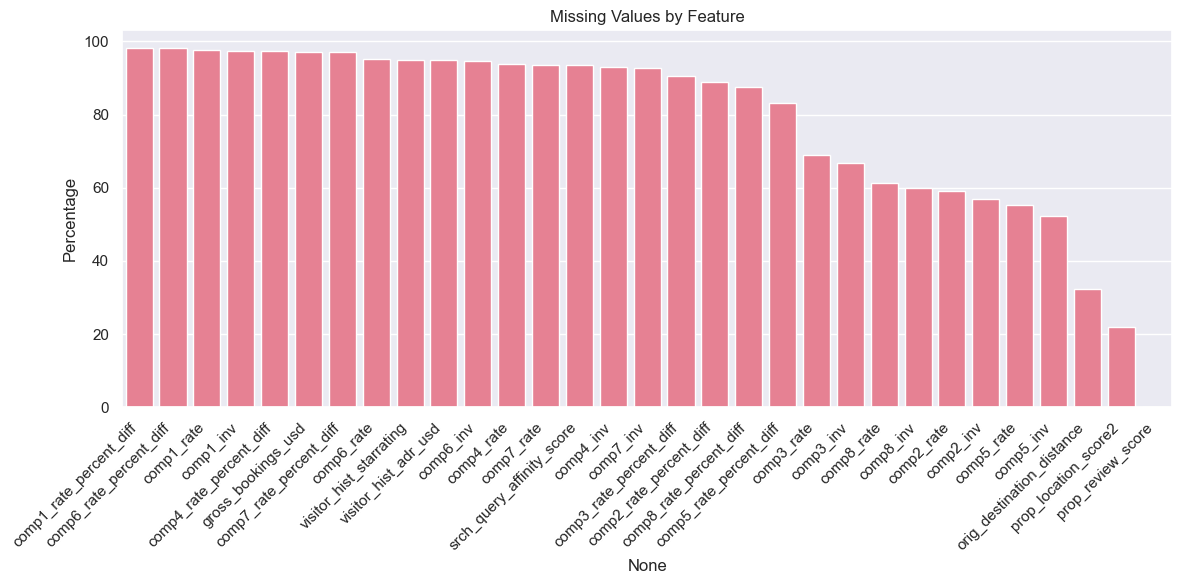

In [17]:
# Get missing value statistics
missing_stats = get_missing_value_stats(train_df)
print("Missing Value Statistics:")
display(missing_stats)

# Plot missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_stats.index, y='Percentage', data=missing_stats)
plt.xticks(rotation=45, ha='right')
plt.title('Missing Values by Feature')
plt.tight_layout()
plt.show()

## 4. Target Variable Analysis

In [ ]:
# Analyze booking and click behavior
booking_stats = train_df['booking_bool'].value_counts(normalize=True) * 100
click_stats = train_df['click_bool'].value_counts(normalize=True) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot booking distribution
sns.barplot(x=booking_stats.index, y=booking_stats.values, ax=ax1)
ax1.set_title('Booking Distribution')
ax1.set_xlabel('Booked')
ax1.set_ylabel('Percentage')

# Plot click distribution
sns.barplot(x=click_stats.index, y=click_stats.values, ax=ax2)
ax2.set_title('Click Distribution')
ax2.set_xlabel('Clicked')
ax2.set_ylabel('Percentage')

plt.tight_layout()
plt.show()

## 5. Hotel Property Analysis

In [ ]:
# Analyze hotel star ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='prop_starrating')
plt.title('Distribution of Hotel Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

# Analyze review scores
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='prop_review_score', bins=20)
plt.title('Distribution of Hotel Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

## 6. User Behavior Analysis

In [ ]:
# Analyze length of stay preferences
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='srch_length_of_stay')
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay (nights)')
plt.ylabel('Count')
plt.show()

# Analyze booking window
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='srch_booking_window', bins=30)
plt.title('Distribution of Booking Window')
plt.xlabel('Days until Stay')
plt.ylabel('Count')
plt.show()

## 7. Price Analysis

Price Statistics:
count    4.958347e+06
mean     2.542096e+02
std      1.600124e+04
min      0.000000e+00
25%      8.500000e+01
50%      1.220000e+02
75%      1.849600e+02
max      1.972633e+07
Name: price_usd, dtype: float64


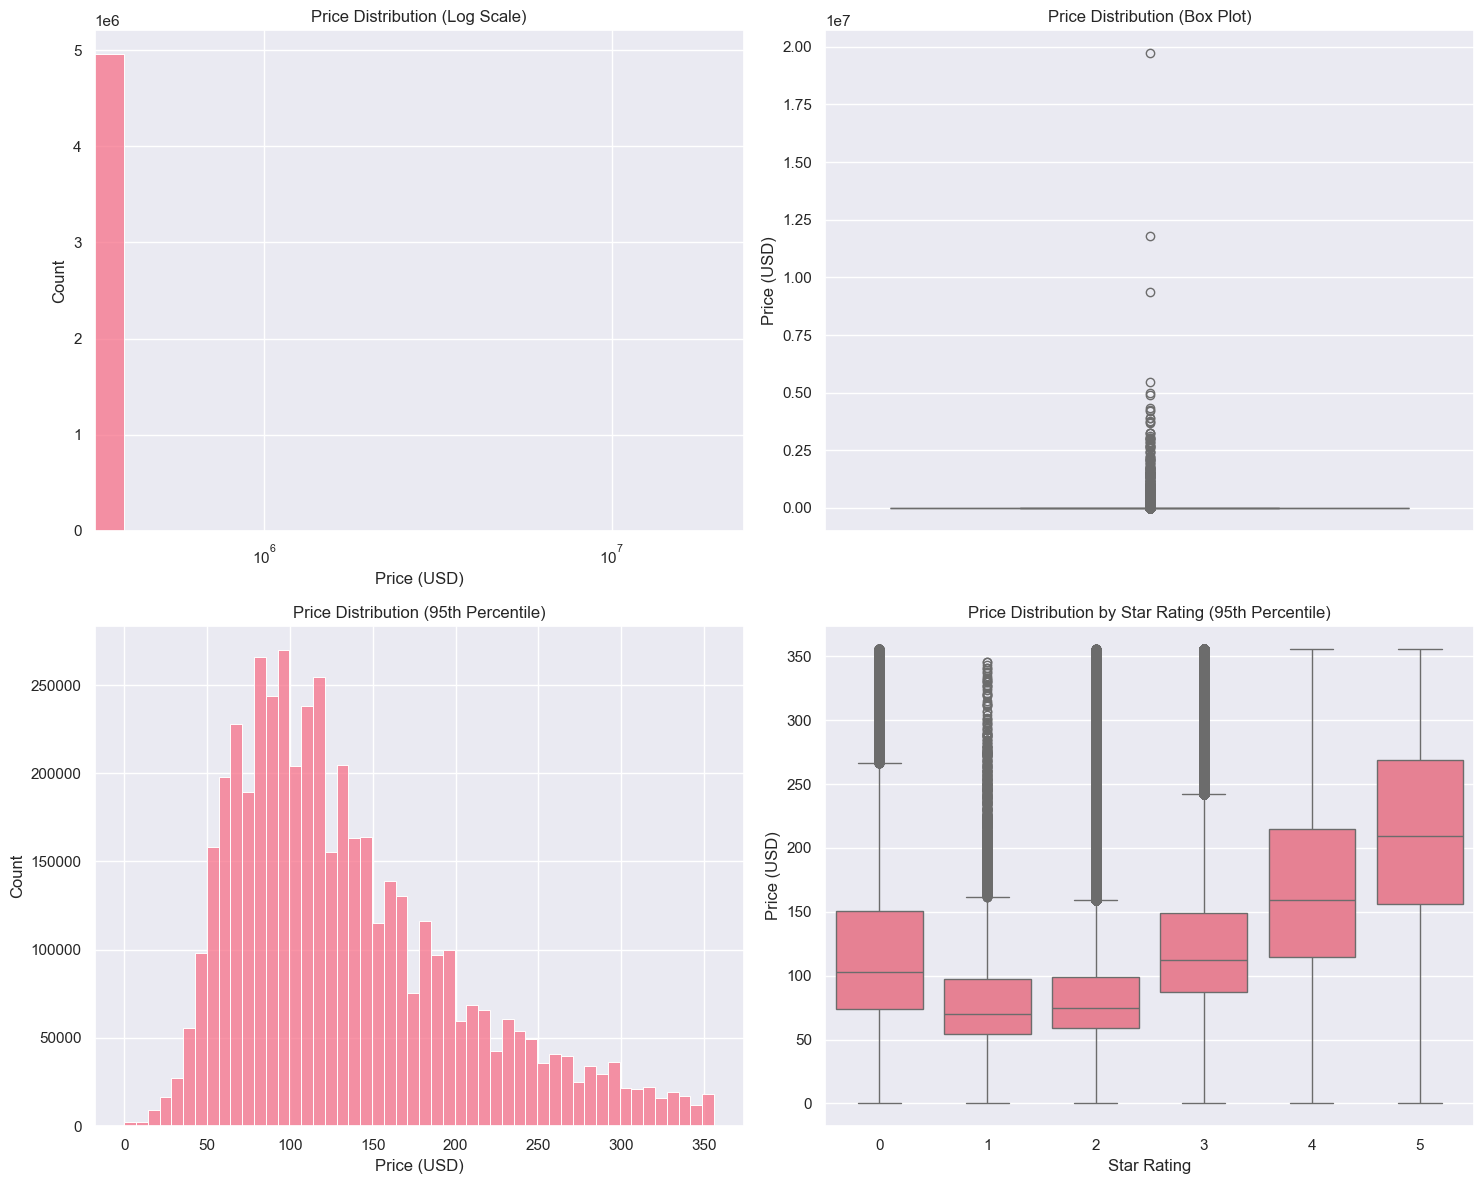


Price Statistics (excluding outliers):
95th percentile: $356.00
Number of prices above 95th percentile: 247697
Percentage of prices above 95th percentile: 5.00%


In [13]:
# Calculate price statistics
price_stats = train_df['price_usd'].describe()
print("Price Statistics:")
print(price_stats)

# Create a figure with multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Log scale histogram
sns.histplot(data=train_df, x='price_usd', bins=50, ax=ax1)
ax1.set_xscale('log')
ax1.set_title('Price Distribution (Log Scale)')
ax1.set_xlabel('Price (USD)')
ax1.set_ylabel('Count')

# 2. Box plot of prices
sns.boxplot(data=train_df, y='price_usd', ax=ax2)
ax2.set_title('Price Distribution (Box Plot)')
ax2.set_ylabel('Price (USD)')

# 3. Histogram of prices within 95th percentile
price_95 = train_df['price_usd'].quantile(0.95)
sns.histplot(data=train_df[train_df['price_usd'] <= price_95], 
             x='price_usd', bins=50, ax=ax3)
ax3.set_title('Price Distribution (95th Percentile)')
ax3.set_xlabel('Price (USD)')
ax3.set_ylabel('Count')

# 4. Price distribution by star rating (excluding outliers)
sns.boxplot(data=train_df[train_df['price_usd'] <= price_95], 
            x='prop_starrating', y='price_usd', ax=ax4)
ax4.set_title('Price Distribution by Star Rating (95th Percentile)')
ax4.set_xlabel('Star Rating')
ax4.set_ylabel('Price (USD)')

plt.tight_layout()
plt.show()

# Print some additional statistics
print(f"\nPrice Statistics (excluding outliers):")
print(f"95th percentile: ${price_95:.2f}")
print(f"Number of prices above 95th percentile: {len(train_df[train_df['price_usd'] > price_95])}")
print(f"Percentage of prices above 95th percentile: {(len(train_df[train_df['price_usd'] > price_95]) / len(train_df) * 100):.2f}%")

## 8. Correlation Analysis

In [ ]:
# Select numerical columns for correlation analysis
numerical_cols = train_df.select_dtypes(include=[np.number]).columns
correlation_matrix = train_df[numerical_cols].corr()

# Plot correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## 9. Key Findings and Insights

Based on our exploratory data analysis, here are the key findings:

1. **Data Quality**:
   - [To be filled after running the analysis]

2. **User Behavior**:
   - [To be filled after running the analysis]

3. **Hotel Characteristics**:
   - [To be filled after running the analysis]

4. **Booking Patterns**:
   - [To be filled after running the analysis]

5. **Feature Importance**:
   - [To be filled after running the analysis]

These insights will guide our feature engineering and model selection in the next steps.

## 10. EDA for `visitor_hist_starrating` and `visitor_hist_adr_usd`

Investigating missing values and distributions for `visitor_hist_starrating` and `visitor_hist_adr_usd`.
`null` for these features indicates no prior purchase history for the customer.

In [21]:
if 'train_df' in locals() or 'train_df' in globals():
    features_to_analyze = ['visitor_hist_starrating', 'visitor_hist_adr_usd']
    for col in features_to_analyze:
        missing_percentage = train_df[col].isnull().sum() * 100 / len(train_df)
        print(f"Missing values in {col}: {missing_percentage:.2f}%")
else:
    print("train_df not loaded. Skipping missing value percentage calculation.")

Missing values in visitor_hist_starrating: 94.92%
Missing values in visitor_hist_adr_usd: 94.90%


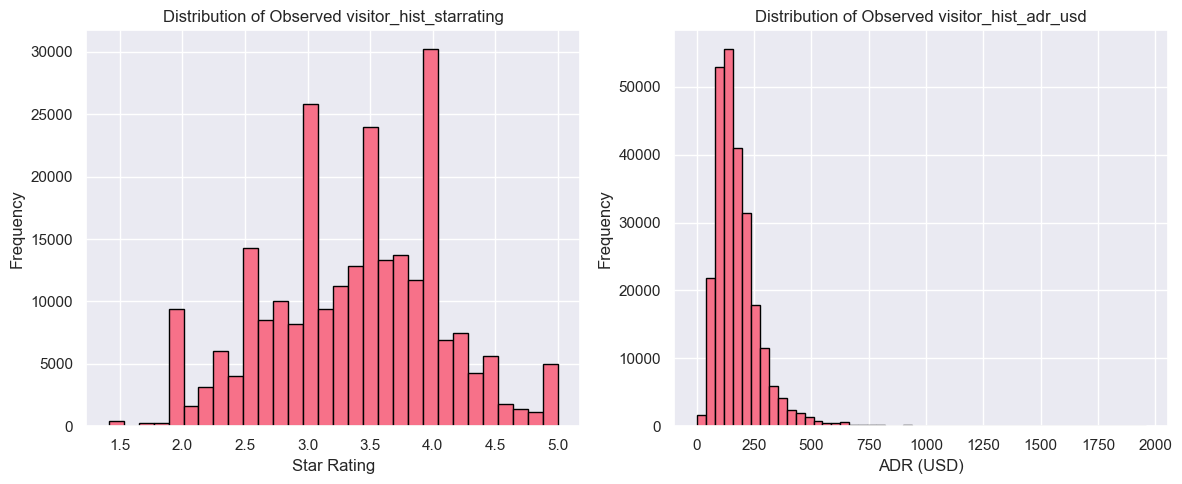

In [22]:
if 'train_df' in locals() or 'train_df' in globals():
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    train_df['visitor_hist_starrating'].dropna().hist(bins=30, edgecolor='black')
    plt.title('Distribution of Observed visitor_hist_starrating')
    plt.xlabel('Star Rating')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    train_df['visitor_hist_adr_usd'].dropna().hist(bins=50, edgecolor='black')
    plt.title('Distribution of Observed visitor_hist_adr_usd')
    plt.xlabel('ADR (USD)')
    plt.ylabel('Frequency')
    # Consider log scale if ADR is highly skewed
    # plt.yscale('log')

    plt.tight_layout()
    plt.show()
else:
    print("train_df not loaded. Skipping distribution plots.")

In [23]:
if 'train_df' in locals() or 'train_df' in globals():
    # Create temporary indicator for having history
    df_analysis = train_df.copy() # Work on a copy for this analysis
    df_analysis['has_history_starrating'] = df_analysis['visitor_hist_starrating'].notnull()
    df_analysis['has_history_adr_usd'] = df_analysis['visitor_hist_adr_usd'].notnull()

    print("--- Relationship with click_bool ---")
    print("\\nClick rate by visitor_hist_starrating presence:")
    print(df_analysis.groupby('has_history_starrating')['click_bool'].agg(['mean', 'count']))

    print("\\nClick rate by visitor_hist_adr_usd presence:")
    print(df_analysis.groupby('has_history_adr_usd')['click_bool'].agg(['mean', 'count']))

    print("\\n--- Relationship with booking_bool ---")
    print("\\nBooking rate by visitor_hist_starrating presence:")
    print(df_analysis.groupby('has_history_starrating')['booking_bool'].agg(['mean', 'count']))

    print("\\nBooking rate by visitor_hist_adr_usd presence:")
    print(df_analysis.groupby('has_history_adr_usd')['booking_bool'].agg(['mean', 'count']))

    # Clean up temporary columns if desired, or keep them for further analysis
    # del df_analysis['has_history_starrating']
    # del df_analysis['has_history_adr_usd']
else:
    print("train_df not loaded. Skipping target variable relationship analysis.")


--- Relationship with click_bool ---
\nClick rate by visitor_hist_starrating presence:
                            mean    count
has_history_starrating                   
False                   0.044776  4706481
True                    0.044238   251866
\nClick rate by visitor_hist_adr_usd presence:
                         mean    count
has_history_adr_usd                   
False                0.044774  4705359
True                 0.044279   252988
\n--- Relationship with booking_bool ---
\nBooking rate by visitor_hist_starrating presence:
                            mean    count
has_history_starrating                   
False                   0.027473  4706481
True                    0.036083   251866
\nBooking rate by visitor_hist_adr_usd presence:
                         mean    count
has_history_adr_usd                   
False                0.027470  4705359
True                 0.036104   252988


## 11. Key Observations

High Missingness (95%): Both visitor_hist_starrating and visitor_hist_adr_usd are missing for ~95% of the entries. This confirms that "no purchase history" is the predominant case.
Click Behavior: The presence or absence of purchase history doesn't seem to make a significant difference in the click_bool rate. Click rates are very similar for users with and without history.
Booking Behavior (Crucial Finding): This is where it gets interesting!
Users with purchase history (has_history_starrating or has_history_adr_usd is True) have a noticeably higher booking rate (~3.61%) compared to users without purchase history (~2.75%).
This difference suggests that the "no purchase history" status is a valuable piece of information for predicting bookings.

## 12. EDA for `prop_location_score2`

Investigating missing values, distribution, and relationship with target variables for `prop_location_score2`. This feature is described as "A (second) score outlining the desirability of a hotel's location".

In [24]:
# Ensure train_df is loaded.
if 'train_df' in locals() or 'train_df' in globals():
    feature_to_analyze = 'prop_location_score2'
    missing_percentage = train_df[feature_to_analyze].isnull().sum() * 100 / len(train_df)
    print(f"Missing values in {feature_to_analyze}: {missing_percentage:.2f}%")

    # Also, let's check the data type
    print(f"Data type of {feature_to_analyze}: {train_df[feature_to_analyze].dtype}")
else:
    print("train_df not found. Please load your training data and name the DataFrame 'train_df'.")

Missing values in prop_location_score2: 21.99%
Data type of prop_location_score2: float64


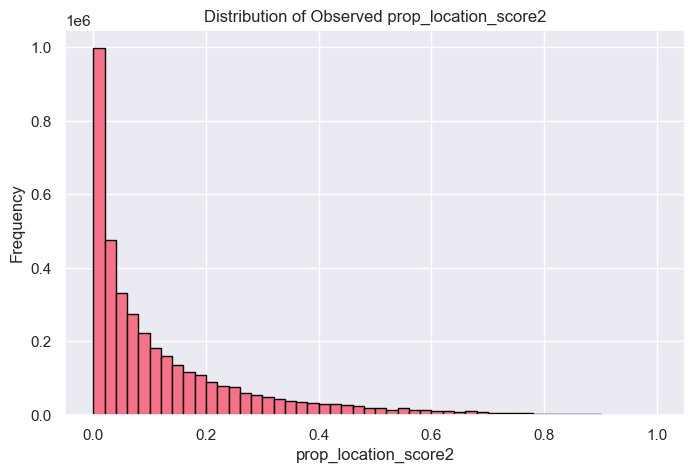


Descriptive statistics for observed prop_location_score2:
count    3.867999e+06
mean     1.303852e-01
std      1.594634e-01
min      0.000000e+00
25%      1.900000e-02
50%      6.900000e-02
75%      1.805000e-01
max      1.000000e+00
Name: prop_location_score2, dtype: float64


In [25]:
if 'train_df' in locals() or 'train_df' in globals():
    plt.figure(figsize=(8, 5))
    train_df['prop_location_score2'].dropna().hist(bins=50, edgecolor='black')
    plt.title('Distribution of Observed prop_location_score2')
    plt.xlabel('prop_location_score2')
    plt.ylabel('Frequency')
    plt.show()

    # Descriptive statistics for observed values
    print("\nDescriptive statistics for observed prop_location_score2:")
    print(train_df['prop_location_score2'].dropna().describe())
else:
    print("train_df not loaded. Skipping distribution plot for prop_location_score2.")

In [26]:
if 'train_df' in locals() or 'train_df' in globals():
    # Create a temporary indicator for missingness
    df_analysis = train_df.copy() # Work on a copy
    df_analysis['prop_location_score2_missing'] = df_analysis['prop_location_score2'].isnull()

    print("--- Relationship with click_bool ---")
    print("\\nClick rate by prop_location_score2 presence:")
    print(df_analysis.groupby('prop_location_score2_missing')['click_bool'].agg(['mean', 'count']))

    print("\\n--- Relationship with booking_bool ---")
    print("\\nBooking rate by prop_location_score2 presence:")
    print(df_analysis.groupby('prop_location_score2_missing')['booking_bool'].agg(['mean', 'count']))

    # Further analysis: For non-missing values, how does the score relate to booking/click?
    # We can discretize prop_location_score2 into quantiles for this
    if not df_analysis['prop_location_score2_missing'].all(): # Check if there are any non-missing values
        df_analysis_non_missing = df_analysis[df_analysis['prop_location_score2'].notnull()].copy()
        try:
            df_analysis_non_missing['prop_location_score2_quantile'] = pd.qcut(df_analysis_non_missing['prop_location_score2'], q=4, duplicates='drop') # 4 quantiles (quartiles)
            
            print("\\n--- Click rate by prop_location_score2 quantiles (for non-missing values) ---")
            print(df_analysis_non_missing.groupby('prop_location_score2_quantile')['click_bool'].agg(['mean', 'count']))
            
            print("\\n--- Booking rate by prop_location_score2 quantiles (for non-missing values) ---")
            print(df_analysis_non_missing.groupby('prop_location_score2_quantile')['booking_bool'].agg(['mean', 'count']))
        except ValueError as e:
            print(f"Could not create quantiles for prop_location_score2 (possibly too few unique values or all values are the same after dropping NaNs): {e}")
            print("Skipping quantile analysis for prop_location_score2.")
    else:
        print("Skipping quantile analysis as all prop_location_score2 values are missing.")
        
    # del df_analysis # Optionally delete the copy
else:
    print("train_df not loaded. Skipping target variable relationship analysis for prop_location_score2.")

--- Relationship with click_bool ---
\nClick rate by prop_location_score2 presence:
                                  mean    count
prop_location_score2_missing                   
False                         0.050465  3867999
True                          0.024469  1090348
\n--- Relationship with booking_bool ---
\nBooking rate by prop_location_score2 presence:
                                  mean    count
prop_location_score2_missing                   
False                         0.032036  3867999
True                          0.013275  1090348
\n--- Click rate by prop_location_score2 quantiles (for non-missing values) ---
                                   mean   count
prop_location_score2_quantile                  
(-0.001, 0.019]                0.028131  968390
(0.019, 0.069]                 0.042535  965989
(0.069, 0.18]                  0.057400  966698
(0.18, 1.0]                    0.073823  966922
\n--- Booking rate by prop_location_score2 quantiles (for non-missing valu

## 13. EDA for `orig_destination_distance`

Investigating missing values, distribution, and relationship with target variables for `orig_destination_distance`. This feature is described as "Physical distance between the hotel and the customer at the time of search. A null means the distance could not be calculated."

In [27]:
# Ensure train_df is loaded.
if 'train_df' in locals() or 'train_df' in globals():
    feature_to_analyze = 'orig_destination_distance'
    missing_percentage = train_df[feature_to_analyze].isnull().sum() * 100 / len(train_df)
    print(f"Missing values in {feature_to_analyze}: {missing_percentage:.2f}%")

    # Also, let's check the data type
    print(f"Data type of {feature_to_analyze}: {train_df[feature_to_analyze].dtype}")
else:
    print("train_df not found. Please load your training data and name the DataFrame 'train_df'.")


Missing values in orig_destination_distance: 32.43%
Data type of orig_destination_distance: float64


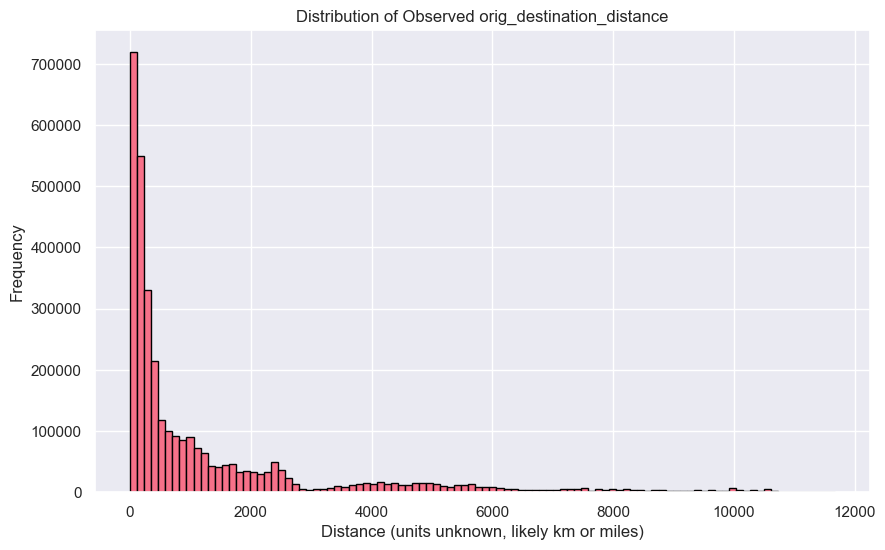

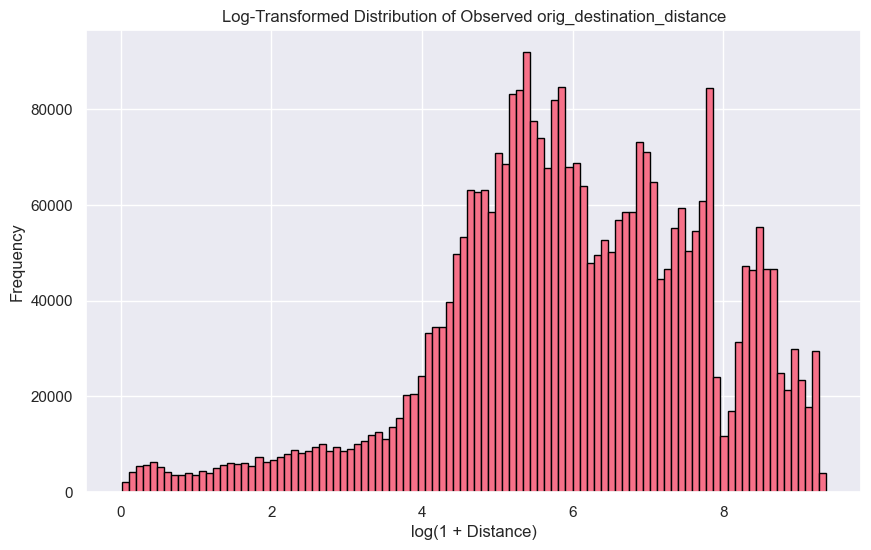


Descriptive statistics for observed orig_destination_distance:
count    3.350565e+06
mean     1.301234e+03
std      2.023951e+03
min      1.000000e-02
25%      1.398000e+02
50%      3.866000e+02
75%      1.500670e+03
max      1.166664e+04
Name: orig_destination_distance, dtype: float64


In [28]:
if 'train_df' in locals() or 'train_df' in globals():
    plt.figure(figsize=(10, 6))
    train_df['orig_destination_distance'].dropna().hist(bins=100, edgecolor='black') # Using more bins due to potential wide range
    plt.title('Distribution of Observed orig_destination_distance')
    plt.xlabel('Distance (units unknown, likely km or miles)')
    plt.ylabel('Frequency')
    plt.show()

    # It's common for distance features to be highly skewed.
    # Let's also look at a log-transformed distribution if there are positive values.
    observed_distances = train_df['orig_destination_distance'].dropna()
    if (observed_distances > 0).any():
        plt.figure(figsize=(10, 6))
        np.log1p(observed_distances).hist(bins=100, edgecolor='black') # log1p handles 0s if they exist
        plt.title('Log-Transformed Distribution of Observed orig_destination_distance')
        plt.xlabel('log(1 + Distance)')
        plt.ylabel('Frequency')
        plt.show()
    else:
        print("No positive observed distances to log-transform, or all are NaN.")


    # Descriptive statistics for observed values
    print("\nDescriptive statistics for observed orig_destination_distance:")
    print(train_df['orig_destination_distance'].dropna().describe())
else:
    print("train_df not loaded. Skipping distribution plot for orig_destination_distance.")

In [29]:
if 'train_df' in locals() or 'train_df' in globals():
    # Create a temporary indicator for missingness
    df_analysis = train_df.copy() # Work on a copy
    df_analysis['orig_destination_distance_missing'] = df_analysis['orig_destination_distance'].isnull()

    print("--- Relationship with click_bool ---")
    print("\\nClick rate by orig_destination_distance presence:")
    print(df_analysis.groupby('orig_destination_distance_missing')['click_bool'].agg(['mean', 'count']))

    print("\\n--- Relationship with booking_bool ---")
    print("\\nBooking rate by orig_destination_distance presence:")
    print(df_analysis.groupby('orig_destination_distance_missing')['booking_bool'].agg(['mean', 'count']))

    # Further analysis: For non-missing values, how does the distance relate to booking/click?
    # We can discretize orig_destination_distance into quantiles for this
    df_analysis_non_missing = df_analysis[df_analysis['orig_destination_distance'].notnull()].copy()
    if not df_analysis_non_missing.empty:
        try:
            # Using 5 quantiles (quintiles) due to potential wide spread of distance values
            df_analysis_non_missing['orig_destination_distance_quantile'] = pd.qcut(df_analysis_non_missing['orig_destination_distance'], q=5, duplicates='drop') 
            
            print("\\n--- Click rate by orig_destination_distance quantiles (for non-missing values) ---")
            print(df_analysis_non_missing.groupby('orig_destination_distance_quantile')['click_bool'].agg(['mean', 'count']))
            
            print("\\n--- Booking rate by orig_destination_distance quantiles (for non-missing values) ---")
            print(df_analysis_non_missing.groupby('orig_destination_distance_quantile')['booking_bool'].agg(['mean', 'count']))
        except ValueError as e:
            print(f"Could not create quantiles for orig_destination_distance (possibly too few unique values or all values are the same after dropping NaNs): {e}")
            print("Skipping quantile analysis for orig_destination_distance.")
    else:
        print("Skipping quantile analysis as all orig_destination_distance values are missing or df_analysis_non_missing is empty.")
        
    # del df_analysis # Optionally delete the copy
else:
    print("train_df not loaded. Skipping target variable relationship analysis for orig_destination_distance.")

--- Relationship with click_bool ---
\nClick rate by orig_destination_distance presence:
                                       mean    count
orig_destination_distance_missing                   
False                              0.043972  3350565
True                               0.046366  1607782
\n--- Relationship with booking_bool ---
\nBooking rate by orig_destination_distance presence:
                                       mean    count
orig_destination_distance_missing                   
False                              0.027966  3350565
True                               0.027795  1607782
\n--- Click rate by orig_destination_distance quantiles (for non-missing values) ---
                                        mean   count
orig_destination_distance_quantile                  
(0.009000000000000001, 108.25]      0.043574  670141
(108.25, 255.016]                   0.044388  670085
(255.016, 672.63]                   0.043826  670120
(672.63, 2000.42]                   0.0433